## Importing Libraries

In [4]:
# Data Processing
import numpy as np
import pandas as pd
from collections import Counter

# Importing tde
import tde

# Visualization
import matplotlib.pyplot as plt


# Model and Performance
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report #for model performance evaluation

In [5]:
## READING MICE DATA
mice = pd.read_excel('/Users/yoddmena/Downloads/Research/Telemetry_edited/Ex 01 - 05_06_19 - Edited.xlsx')
#mice.head()

In [6]:
## Selecting columns and the first 5000 rows then plotting 
x = mice["Minutes"]
name = "CC002-558 Exp. 1 MRSA Deg. C Data"
y = mice[name] #selecting CC002-558 Exp. 1 MRSA Deg. C Data


# Filling in missing values using forward fill
y1_fw = y.fillna(method='ffill')
y1_bw = y1_fw.fillna(method='bfill') #backward fill

## Time Delay Embedding

In [7]:
#TDE on original data
Z = tde.tde(y1_bw)
Z = Z.T

## Train Test Split 3 Days Training 


In [147]:
# ORIGINAL DATA
#importing the model
model1 = svm.OneClassSVM()

#fit the data
model1.fit(Z[:4321,:]) #first 3 days

#predict the data
predict_1_3 = model1.predict(Z[:4321,:]) #5001
predict_2_3 = model1.predict(Z[4321:,:])


## Applying SVM

#### Training Data

Text(0.5, 1.0, 'Predict on 3 Days Training Data')

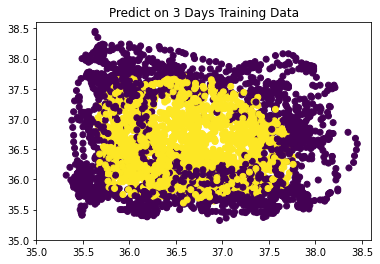

In [148]:
# Plotting the scatterplot (predicting on train data)
plt.scatter(Z[:4321,0],Z[:4321,1], c = predict_1_3)
plt.xlim(35, 38.6) 
plt.ylim(35, 38.6)
plt.title("Predict on 3 Days Training Data")

# Saving the Image
#Predict_train_3 = "Predict_train_3.png"   # saving the file as the name of the mouse
#plt.savefig(Predict_train_3, facecolor='white')

In [149]:
# Plotting the scatterplot (predicting on train data) 
# NONANOMALY
nonanomaly_1_3 = predict_1_3 == 1
z_nonanomaly_1_3 = Z[:4321,:][nonanomaly_1_3]
'''
plot_nonanomaly_1= plt.scatter(z_nonanomaly_1_3[:, 0], z_nonanomaly_1_3[:, 1], c= "yellow")
plt.xlim(35, 38.6)  
plt.ylim(35, 38.6)
plt.title("Training Data Nonanomalies")
'''
# Saving the Image
#Nonanomaly_1 = "Nonanomaly_1.png"   # saving the file as the name of the mouse
#plt.savefig(Nonanomaly_1, facecolor='white')
sum(nonanomaly_1_3)

2161

In [150]:
# Plotting the scatterplot (predicting on train data) 
# ANOMALY
anomaly_1_3 = predict_1_3 == -1
z_anomaly_1_3 = Z[:4321,:][anomaly_1_3]
'''
plot_anomaly_1= plt.scatter(z_anomaly_1[:, 0], z_anomaly_1[:, 1], c= "purple")
plt.xlim(35, 38.6)  
plt.ylim(35, 38.6)
plt.title("Training Data Anomalies")
'''
# Saving the Image
#Anomaly_1 = "Anomaly_1.png"   # saving the file as the name of the mouse
#plt.savefig(Anomaly_1, facecolor='white')
sum(anomaly_1)


2160

#### Testing Data

Text(0.5, 1.0, 'Predict on Testing Data')

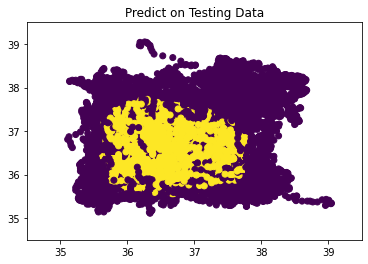

In [151]:
# Plotting the scatterplot (predicting on train data)
plt.scatter(Z[4321:,0],Z[4321:,1], c = predict_2_3)
plt.xlim(34.5, 39.5)  
plt.ylim(34.5, 39.5)
plt.title("Predict on Testing Data")

# Saving the Image
#Predict_test_3 = "Predict_test_3.png"   # saving the file as the name of the mouse
#plt.savefig(Predict_test_3, facecolor='white')

In [152]:
# Plotting the scatterplot (predicting on test data) 
# NONANOMALY
nonanomaly_2_3 = predict_2_3 == 1
z_nonanomaly_2_3 = Z[4321:,:][nonanomaly_2_3]
'''
plot_nonanomaly_2= plt.scatter(z_nonanomaly_2[:, 0], z_nonanomaly_2[:, 1], c= "yellow")
plt.xlim(34.5, 39.5)  
plt.ylim(34.5, 39.5)
plt.title("Testing Data Nonanomalies")
'''
# Saving the Image
#Nonanomaly_2 = "Nonanomaly_2.png"   # saving the file as the name of the mouse
#plt.savefig(Nonanomaly_2, facecolor='white')
sum(nonanomaly_2_3)

3599

In [153]:
# Plotting the scatterplot (predicting on test data) 
# ANOMALY
anomaly_2_3 = predict_2_3 == -1
z_anomaly_2_3 = Z[4321:,:][anomaly_2_3]
'''
plot_anomaly_2= plt.scatter(z_anomaly_2[:, 0], z_anomaly_2[:, 1], c= "purple")
plt.xlim(34.5, 39.5)  
plt.ylim(34.5, 39.5)
plt.title("Testing Data Anomalies")
'''
# Saving the Image
#Anomaly_2 = "Anomaly_2.png"   # saving the file as the name of the mouse
#plt.savefig(Anomaly_2, facecolor='white')
sum(anomaly_2_3)

15755

## Scoring 

In [154]:
scores_1_3 = model.score_samples(Z[:4321,:])
scores_2_3 = model.score_samples(Z[4321:,:])
time = np.arange(Z.shape[0])+(2*720) # 2 times the time delay

In [155]:
#minimum score
min_score_3 = scores_1_3.min()
min_score_3

281.77907638035896

## Identifying Anomalies in Training Data

'\nax[1].plot(predict_1, \'o\', color=\'yellow\') #[:100]\nax[1].grid()\nax[1].set_title("Anomalies", fontsize=14)\nax[1].set_ylim(-1.2, 1.2)\nax[1].set_xlabel("Minutes", fontsize=14)\nax[1].plot(anomaly_indices, predict_1[anomaly_indices], \'o\', color=\'purple\') #[:100]\n'

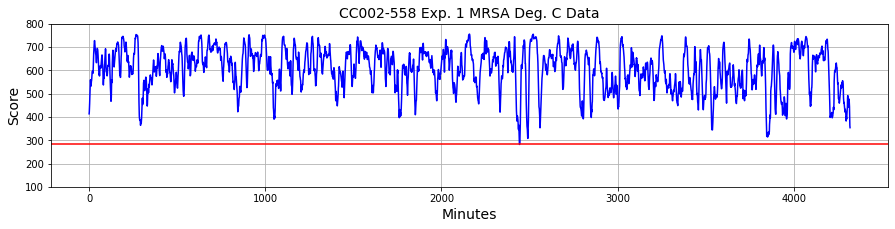

In [158]:
fig,ax = plt.subplots(figsize=(15,3))

#plt.plot(scores,'o')
ax.plot(scores_1_3, '-', color='blue')  # Plot the scores with blue color #[:100]
ax.grid()
ax.set_ylabel("Score", fontsize=14)
ax.set_xlabel("Minutes", fontsize=14)
ax.set_title(name , fontsize=14)
ax.set_ylim(100,800)

# Find the indices of the anomalies
anomaly_indices_3 = [index for index, value in enumerate(predict_1) if value == -1] #[:100]

# Plot the anomalies with red color
#ax.plot(anomaly_indices, scores_1[anomaly_indices], '', color='purple') #[:100]
ax.axhline(y=min_score_3, color='red', linestyle='-')
'''
ax[1].plot(predict_1, 'o', color='yellow') #[:100]
ax[1].grid()
ax[1].set_title("Anomalies", fontsize=14)
ax[1].set_ylim(-1.2, 1.2)
ax[1].set_xlabel("Minutes", fontsize=14)
ax[1].plot(anomaly_indices, predict_1[anomaly_indices], 'o', color='purple') #[:100]
'''

## The x axis starts at 0-200, how do I fix?

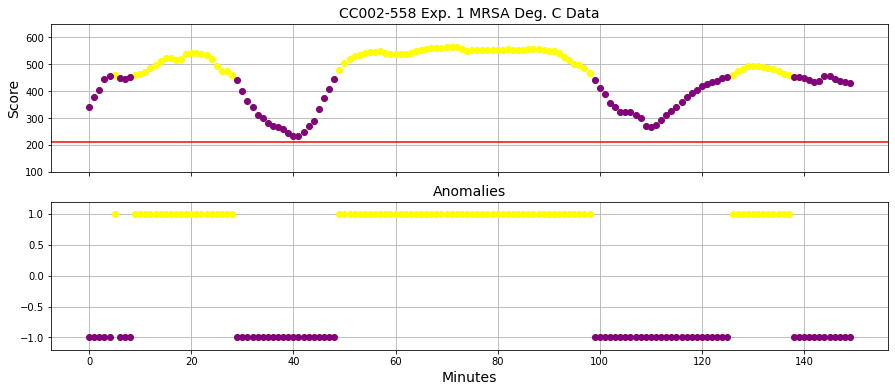

In [18]:
fig,ax = plt.subplots(2, 1, figsize=(15,6), sharex = True)
train_begin = 2450
train_end = 2600

#plt.plot(scores,'o')
ax[0].plot(scores_1[train_begin:train_end], 'o', color='yellow')  # Plot the scores with blue color #
ax[0].grid()
ax[0].set_ylabel("Score", fontsize=14)
ax[0].set_title(name, fontsize=14)
ax[0].set_ylim(100,650)

# Find the indices of the anomalies
anomaly_indices = [index for index, value in enumerate(predict_1[train_begin:train_end]) if value == -1] #

# Plot the anomalies with red color
ax[0].plot(anomaly_indices, scores_1[train_begin:train_end][anomaly_indices], 'o', color='purple') #
ax[0].axhline(y=min_score, color='red', linestyle='-')

ax[1].plot(predict_1[train_begin:train_end], 'o', color='yellow') #
ax[1].grid()
ax[1].set_title("Anomalies", fontsize=14)
ax[1].set_ylim(-1.2, 1.2)
ax[1].set_xlabel("Minutes", fontsize=14)
ax[1].plot(anomaly_indices, predict_1[train_begin:train_end][anomaly_indices], 'o', color='purple') #


## The x axis starts at 0-200, how do I fix?

## Identifying Anomalies in All Data

In [81]:
# Append df2 to df1
combined_scores= np.concatenate((scores_1, scores_2), axis=0)
combined_predictions = np.concatenate((predict_1, predict_2), axis=0)

Index: 5677
Value: 206.70493572999246
First anomaly: 1358 minutes


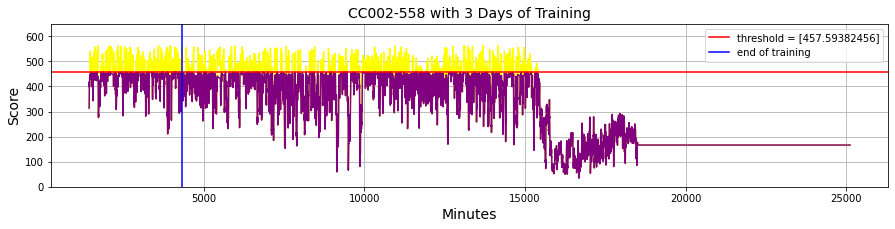

In [85]:
#SckiKit Learn's Threshold
threshold_3 = model.offset_
fig,ax = plt.subplots(figsize=(15,3))

#plt.plot(scores,'o')
ax.plot(time, combined_scores, '-', color='yellow')  # Plot the scores with blue color #[:100]
ax.grid()
ax.set_ylabel("Score", fontsize=14)
ax.set_xlabel("Minutes", fontsize=14)
ax.set_title("CC002-558 with 3 Days of Training" , fontsize=14)
ax.set_ylim(0,650)

# Find the indices of the anomalies
anomaly_indices_2 = np.where(combined_predictions==-1)[0]#[:100]
time_2 = anomaly_indices_2 + (2*720)

# Plot the anomalies with red color
ax.plot(time_2, combined_scores[anomaly_indices_2], '', color='purple') #[:100]
ax.axhline(y=threshold_3, color='red', linestyle='-', label = f'threshold = {threshold_3}')
'''
ax[1].plot(time, combined_predictions, 'o', color='yellow') #[:100]
ax[1].grid()
ax[1].set_title("Anomalies", fontsize=14)
ax[1].set_ylim(-1.2, 1.2)
ax[1].set_xlabel("Minutes", fontsize=14)
ax[1].plot(time_2, combined_predictions[anomaly_indices_2], 'o', color='purple') #[:100]
'''
# Find the index at which the first score is less than min_score
index = np.argmax(combined_scores < min_score)

# Get the corresponding value
value = combined_scores[index]
print("Index:", index)
print("Value:", value)

index = index + 1 #since index starts at 0

#ax.axvline(x=index+720, color='blue', linestyle='--', label = 'first anomaly') # when the first value is less the minimum value
ax.axvline(x=4320, color='blue', linestyle='-', label = 'end of training')
ax.legend()
## The x axis starts at 0-200, how do I fix?

time_after = index - 4320
print(f"First anomaly: {time_after} minutes") 

# Saving the Image
filename_3 = "CC002-558_SL_3.png"   # saving the file as the name of the mouse
fig.savefig(filename_3, bbox_inches='tight')

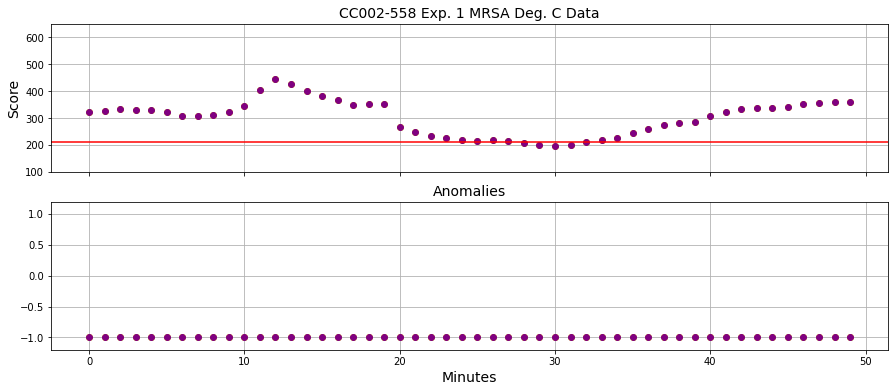

In [21]:
fig,ax = plt.subplots(2, 1, figsize=(15,6), sharex = True)
test_begin = 2800
test_end = 2850

#plt.plot(scores,'o')
ax[0].plot(scores_2[test_begin:test_end], 'o', color='yellow')  # Plot the scores with blue color #
ax[0].grid()
ax[0].set_ylabel("Score", fontsize=14)
ax[0].set_title(name , fontsize=14)
ax[0].set_ylim(100,650)

# Find the indices of the anomalies
anomaly_indices_2 = [index for index, value in enumerate(predict_2[test_begin:test_end]) if value == -1] #

# Plot the anomalies with red color
ax[0].plot(anomaly_indices_2, scores_2[test_begin:test_end][anomaly_indices_2], 'o', color='purple') #
ax[0].axhline(y=min_score, color='red', linestyle='-')

ax[1].plot(predict_2[test_begin:test_end], 'o', color='yellow') #
ax[1].grid()
ax[1].set_title("Anomalies", fontsize=14)
ax[1].set_ylim(-1.2, 1.2)
ax[1].set_xlabel("Minutes", fontsize=14)
ax[1].plot(anomaly_indices_2, predict_2[test_begin:test_end][anomaly_indices_2], 'o', color='purple') #


## The x axis starts at 0-200, how do I fix?

## 4 Days Training

In [140]:
# ORIGINAL DATA
#importing the model
model = svm.OneClassSVM()

#fit the data
model.fit(Z[:5761,:]) #first 4 days

#predict the data
predict_1_4 = model.predict(Z[:5761,:]) #5001
predict_2_4 = model.predict(Z[5761:,:])


In [141]:
anomaly_2_4 = predict_1_4 == 1
sum(anomaly_2_4)

2882

### Applying SVM

#### Training Data

2882

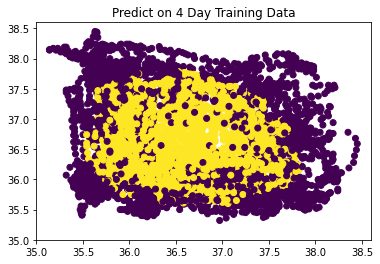

In [125]:
# Plotting the scatterplot (predicting on train data)
plt.scatter(Z[:5761,0],Z[:5761,1], c = predict_1_4)
plt.xlim(35, 38.6) 
plt.ylim(35, 38.6)
plt.title("Predict on 4 Day Training Data")

# Saving the Image
#Predict_train_4 = "Predict_train_4.png"   # saving the file as the name of the mouse
#plt.savefig(Predict_train_4, facecolor='white')

#### Testing Data

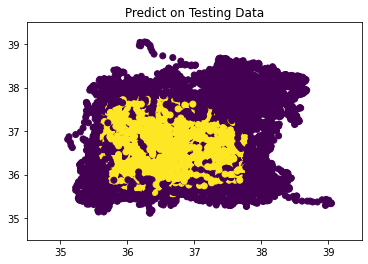

In [93]:
# Plotting the scatterplot (predicting on train data)
plt.scatter(Z[5761:,0],Z[5761:,1], c = predict_2_4)
plt.xlim(34.5, 39.5)  
plt.ylim(34.5, 39.5)
plt.title("Predict on Testing Data")

# Saving the Image
#Predict_test_4 = "Predict_test_4.png"   # saving the file as the name of the mouse
#plt.savefig(Predict_test_4, facecolor='white')

## Scoring 

In [75]:
scores_1_4 = model.score_samples(Z[:5761,:])
scores_2_4 = model.score_samples(Z[5761:,:])
time = np.arange(Z.shape[0])+(2*720) # 2 times the time delay

In [76]:
# Append df2 to df1
combined_scores_4= np.concatenate((scores_1_4, scores_2_4), axis=0)
combined_predictions_4 = np.concatenate((predict_1_4, predict_2_4), axis=0)

## Identifying Anomalies in Training Data

Index: 5688
Value: 99.02737141562397
First anomaly: -71 minutes


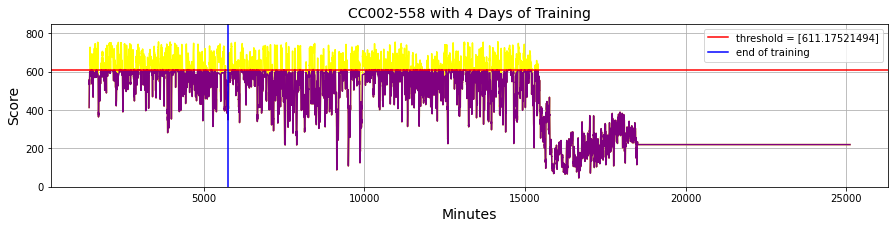

In [111]:
#SckiKit Learn's Threshold
threshold_4 = model.offset_
fig,ax = plt.subplots(figsize=(15,3))

#plt.plot(scores,'o')
ax.plot(time, combined_scores_4, '-', color='yellow')  # Plot the scores with blue color #[:100]
ax.grid()
ax.set_ylabel("Score", fontsize=14)
ax.set_xlabel("Minutes", fontsize=14)
ax.set_title("CC002-558 with 4 Days of Training" , fontsize=14)
ax.set_ylim(0,850)

# Find the indices of the anomalies
anomaly_indices_2 = np.where(combined_predictions_4==-1)[0]#[:100]
time_2 = anomaly_indices_2 + (2*720)

# Plot the anomalies with red color
ax.plot(time_2, combined_scores_4[anomaly_indices_2], '', color='purple') #[:100]
ax.axhline(y=threshold_4, color='red', linestyle='-', label = f'threshold = {threshold_4}')
'''
ax[1].plot(time, combined_predictions, 'o', color='yellow') #[:100]
ax[1].grid()
ax[1].set_title("Anomalies", fontsize=14)
ax[1].set_ylim(-1.2, 1.2)
ax[1].set_xlabel("Minutes", fontsize=14)
ax[1].plot(time_2, combined_predictions[anomaly_indices_2], 'o', color='purple') #[:100]
'''
# Find the index at which the first score is less than min_score
index_4 = np.argmax(combined_scores_4 < min_score)

# Get the corresponding value
value_4 = combined_scores_4[index_4]
print("Index:", index)
print("Value:", value_4)

index = index + 1 #since index starts at 0

#ax.axvline(x=index+720, color='blue', linestyle='--', label = 'first anomaly') # when the first value is less the minimum value
ax.axvline(x=5760, color='blue', linestyle='-', label = 'end of training')
ax.legend()
## The x axis starts at 0-200, how do I fix?

time_after = index - 5760
print(f"First anomaly: {time_after} minutes") 

# Saving the Image
filename_4 = "CC002-558_SL_4.png"   # saving the file as the name of the mouse
fig.savefig(filename_4, bbox_inches='tight')

In [ ]:
#SckiKit Learn's Threshold
fig,ax = plt.subplots(2,1,figsize=(15,3))

#plt.plot(scores,'o')
ax.plot(time, combined_scores_4, '-', color='black')  # Plot the scores with blue color #[:100]
ax.grid()
ax.set_ylabel("Score", fontsize=14)
ax.set_xlabel("Minutes", fontsize=14)
ax.set_title("CC002-558 with 4 Days of Training" , fontsize=14)
ax.set_ylim(0,850)

# Find the indices of the anomalies
anomaly_indices_2 = np.where(combined_predictions_4==-1)[0]#[:100]
time_2 = anomaly_indices_2 + (2*720)

# Plot the anomalies with red color
ax.plot(time_2, combined_scores_4[anomaly_indices_2], '', color='purple') #[:100]
ax.axhline(y=threshold_4, color='red', linestyle='-', label = f'threshold = {threshold_4}')
'''
ax[1].plot(time, combined_predictions, 'o', color='yellow') #[:100]
ax[1].grid()
ax[1].set_title("Anomalies", fontsize=14)
ax[1].set_ylim(-1.2, 1.2)
ax[1].set_xlabel("Minutes", fontsize=14)
ax[1].plot(time_2, combined_predictions[anomaly_indices_2], 'o', color='purple') #[:100]
'''
# Find the index at which the first score is less than min_score
index_4 = np.argmax(combined_scores_4 < min_score)

# Get the corresponding value
value_4 = combined_scores_4[index_4]
print("Index:", index)
print("Value:", value_4)

index = index + 1 #since index starts at 0

#ax.axvline(x=index+720, color='blue', linestyle='--', label = 'first anomaly') # when the first value is less the minimum value
ax.axvline(x=5760, color='blue', linestyle='-', label = 'end of training')
ax.legend()
## The x axis starts at 0-200, how do I fix?

time_after = index - 5760
print(f"First anomaly: {time_after} minutes") 

# Saving the Image
filename_4 = "CC002-558_SL_4.png"   # saving the file as the name of the mouse
fig.savefig(filename_4, bbox_inches='tight')

## 5 Days Training

In [137]:
# ORIGINAL DATA
#importing the model
model = svm.OneClassSVM()

#fit the data
model.fit(Z[:7201,:]) #first 4 days

#predict the data
predict_1_5 = model.predict(Z[:7201,:]) #5001
predict_2_5 = model.predict(Z[7201:,:])


In [139]:
anomaly_2_4 = predict_2_5 == -1
sum(anomaly_2_4)

13198

### Applying SVM

#### Training Data

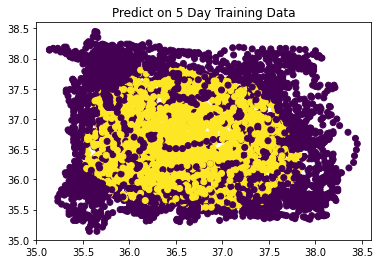

In [95]:
# Plotting the scatterplot (predicting on train data)
plt.scatter(Z[:7201,0],Z[:7201,1], c = predict_1_5)
plt.xlim(35, 38.6) 
plt.ylim(35, 38.6)
plt.title("Predict on 5 Day Training Data")

# Saving the Image
Predict_train_5 = "Predict_train_5.png"   # saving the file as the name of the mouse
plt.savefig(Predict_train_5, facecolor='white')

#### Testing Data

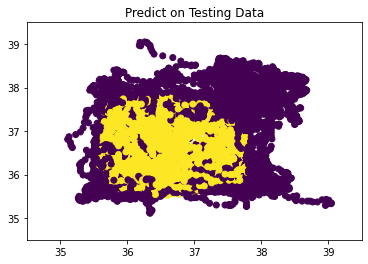

In [96]:
# Plotting the scatterplot (predicting on train data)
plt.scatter(Z[7201:,0],Z[7201:,1], c = predict_2_5)
plt.xlim(34.5, 39.5)  
plt.ylim(34.5, 39.5)
plt.title("Predict on Testing Data")

# Saving the Image
Predict_test_5 = "Predict_test_5.png"   # saving the file as the name of the mouse
plt.savefig(Predict_test_5, facecolor='white')

## Scoring 

In [97]:
scores_1_5 = model.score_samples(Z[:7201,:])
scores_2_5 = model.score_samples(Z[7201:,:])
time = np.arange(Z.shape[0])+(2*720) # 2 times the time delay

In [98]:
# Append df2 to df1
combined_scores_5= np.concatenate((scores_1_5, scores_2_5), axis=0)
combined_predictions_5 = np.concatenate((predict_1_5, predict_2_5), axis=0)

## Identifying Anomalies in Training Data

Index: 7702
Value: 160.53621948582975
First anomaly: -1512 minutes


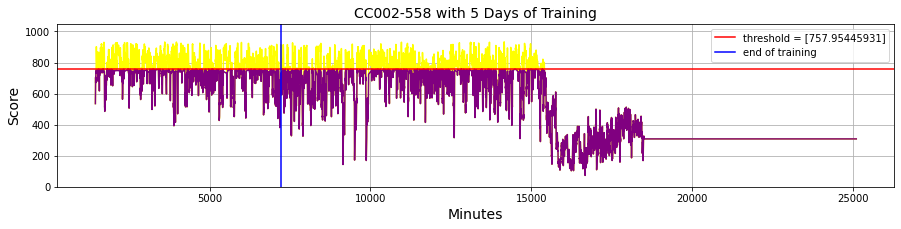

In [109]:
#SckiKit Learn's Threshold
threshold_5 = model.offset_
fig,ax = plt.subplots(figsize=(15,3))

#plt.plot(scores,'o')
ax.plot(time, combined_scores_5, '-', color='yellow')  # Plot the scores with blue color #[:100]
ax.grid()
ax.set_ylabel("Score", fontsize=14)
ax.set_xlabel("Minutes", fontsize=14)
ax.set_title("CC002-558 with 5 Days of Training" , fontsize=14)
ax.set_ylim(0,1050)

# Find the indices of the anomalies
anomaly_indices_2 = np.where(combined_predictions_5==-1)[0]#[:100]
time_2 = anomaly_indices_2 + (2*720)

# Plot the anomalies with red color
ax.plot(time_2, combined_scores_5[anomaly_indices_2], '', color='purple') #[:100]
ax.axhline(y=threshold_5, color='red', linestyle='-', label = f'threshold = {threshold_5}')
'''
ax[1].plot(time, combined_predictions, 'o', color='yellow') #[:100]
ax[1].grid()
ax[1].set_title("Anomalies", fontsize=14)
ax[1].set_ylim(-1.2, 1.2)
ax[1].set_xlabel("Minutes", fontsize=14)
ax[1].plot(time_2, combined_predictions[anomaly_indices_2], 'o', color='purple') #[:100]
'''
# Find the index at which the first score is less than min_score
index_5 = np.argmax(combined_scores_5 < min_score)

# Get the corresponding value
value_5 = combined_scores_5[index_5]
print("Index:", index_5)
print("Value:", value_5)

index = index + 1 #since index starts at 0

#ax.axvline(x=index+720, color='blue', linestyle='--', label = 'first anomaly') # when the first value is less the minimum value
ax.axvline(x=7200, color='blue', linestyle='-', label = 'end of training')
ax.legend()
## The x axis starts at 0-200, how do I fix?

time_after = index - 7200
print(f"First anomaly: {time_after} minutes") 

# Saving the Image
filename_5 = "CC002-558_SL_5.png"   # saving the file as the name of the mouse
fig.savefig(filename_5, bbox_inches='tight')